In [38]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
#load the dataset
df=pd.read_csv('C:/Users/Prachi Desai/Documents/AQI_Index of hydrabad/AQI Data Set.csv')
df

,Id,Mounths,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
0,1,Jan-17,174.0,26.4,35.0,79,25.0,107.6,0.90,0.70,149.0
1,2,Feb-17,143.0,35.1,40.3,75,31.0,103.0,0.90,0.90,129.0
2,3,Mar-17,142.0,32.1,30.9,59,26.0,80.7,0.80,0.50,128.0
3,4,Apr-17,117.0,50.9,36.3,75,36.0,79.5,0.90,0.70,111.0
4,5,May-17,NaN,41.6,25.2,53,28.0,70.0,0.50,0.50,NaN
...,...,...,...,...,...,...,...,...,...,...,...
67,68,Aug-22,89.0,12.0,35.0,22,26.0,15.2,0.64,0.09,67.0
68,69,Sep-22,92.0,13.0,37.3,30,31.0,10.0,0.70,0.06,76.0
69,70,Oct-22,93.0,12.0,30.7,46,28.0,9.7,0.67,0.07,101.0
70,71,Nov-22,87.0,10.4,28.2,78,30.0,12.1,1.52,0.03,166.0


In [55]:
#Checking the null values if present
missing_values = df.isnull().sum()
print(missing_values)

Id                         0
Mounths                    0
PM10 in æg/m3              6
SO2 in æg/m3               1
NOx  in æg/m3              2
 PM2.5  in æg/m3           0
Ammonia - NH3  in æg/m3    0
O3   in æg/m3              0
CO  in mg/m3               0
 Benzene  in æg/m3         0
AQI                        5
dtype: int64


In [56]:
#Filling the null values
df['PM10 in æg/m3']=df['PM10 in æg/m3'].fillna(df['PM10 in æg/m3'].median())
df['SO2 in æg/m3']=df['SO2 in æg/m3'].fillna(df['SO2 in æg/m3'].mean())
df['NOx  in æg/m3']=df['NOx  in æg/m3'].fillna(df['NOx  in æg/m3'].mean())
df['AQI']=df['AQI'].fillna(df['AQI'].mean())

In [57]:
#checking the null value counts
df.isna().sum()

Id                         0
Mounths                    0
PM10 in æg/m3              0
SO2 in æg/m3               0
NOx  in æg/m3              0
 PM2.5  in æg/m3           0
Ammonia - NH3  in æg/m3    0
O3   in æg/m3              0
CO  in mg/m3               0
 Benzene  in æg/m3         0
AQI                        0
dtype: int64

In [58]:
#drop the id and month column
df = df.drop(columns=['Id'])
df = df.drop(columns=['Mounths'])

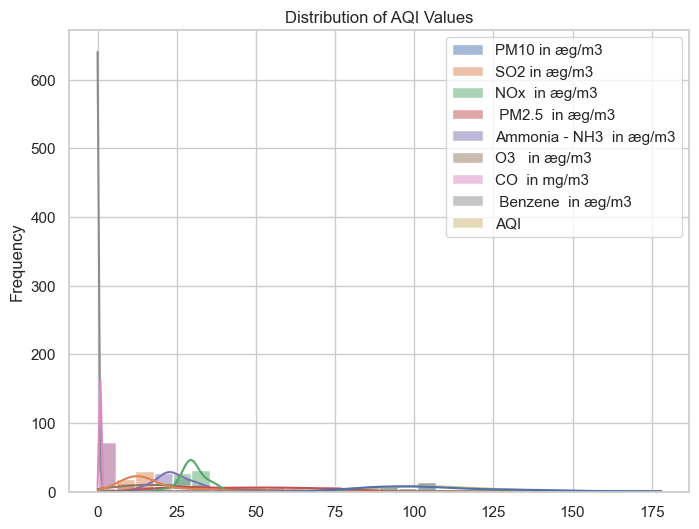

In [59]:
#Hist plot
plt.figure(figsize=(8, 6))
sns.histplot(df, kde=True, bins=30)
plt.title('Distribution of AQI Values')
plt.ylabel('Frequency')
plt.show()

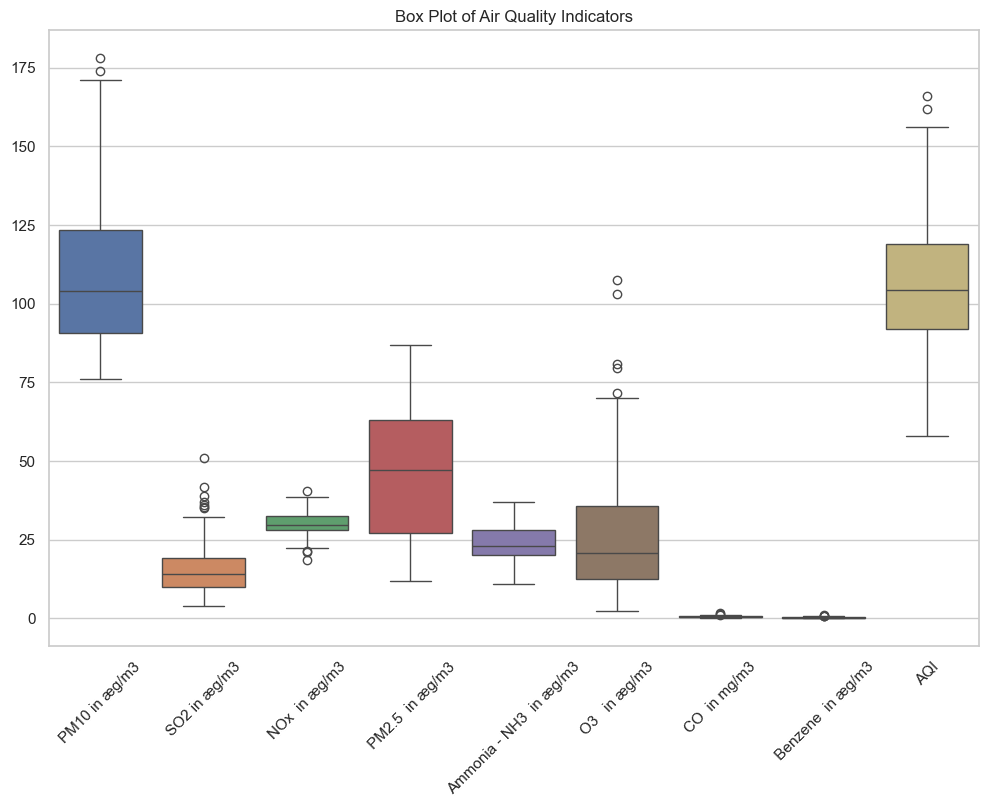

In [60]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Generate box plots for each numeric column except 'Id' and 'Months'
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))

plt.title('Box Plot of Air Quality Indicators')
plt.xticks(rotation=45)
plt.show()

Data after handling outliers:


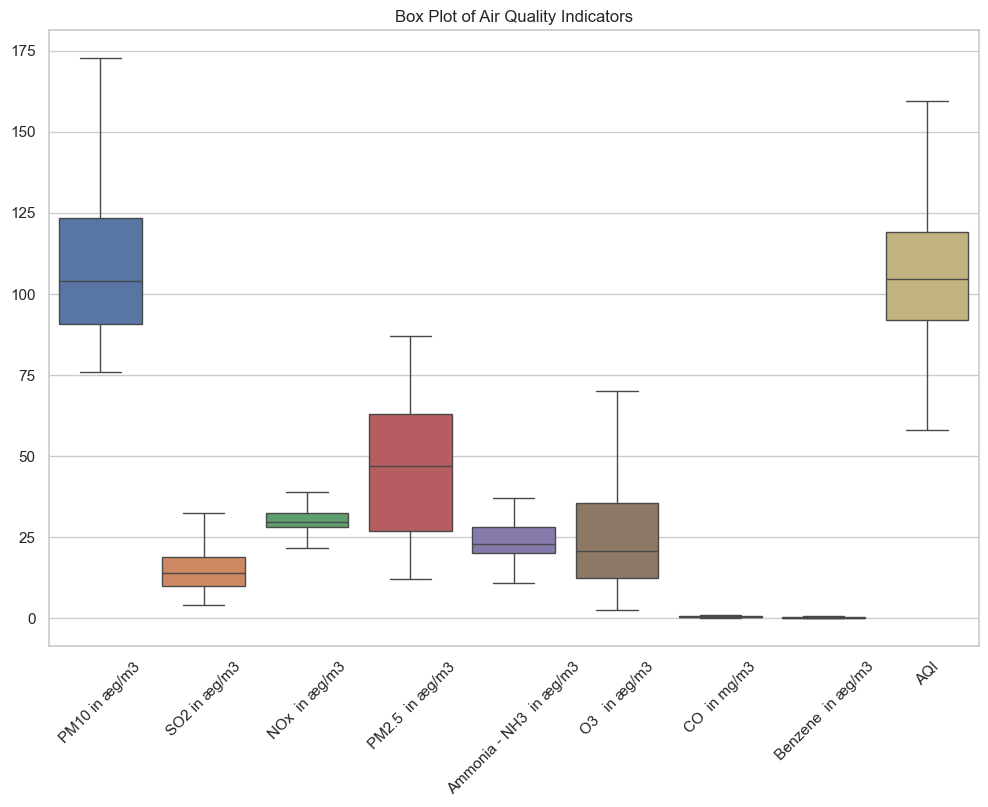

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Capping outliers
        df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return df

# Selecting numeric columns for outlier handling, excluding 'Id' and 'Months'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Remove outliers
df = remove_outliers_iqr(df, numeric_columns)

print("Data after handling outliers:")
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Generate box plots for each numeric column
sns.boxplot(data=df[numeric_columns])

plt.title('Box Plot of Air Quality Indicators')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x1000 with 0 Axes>

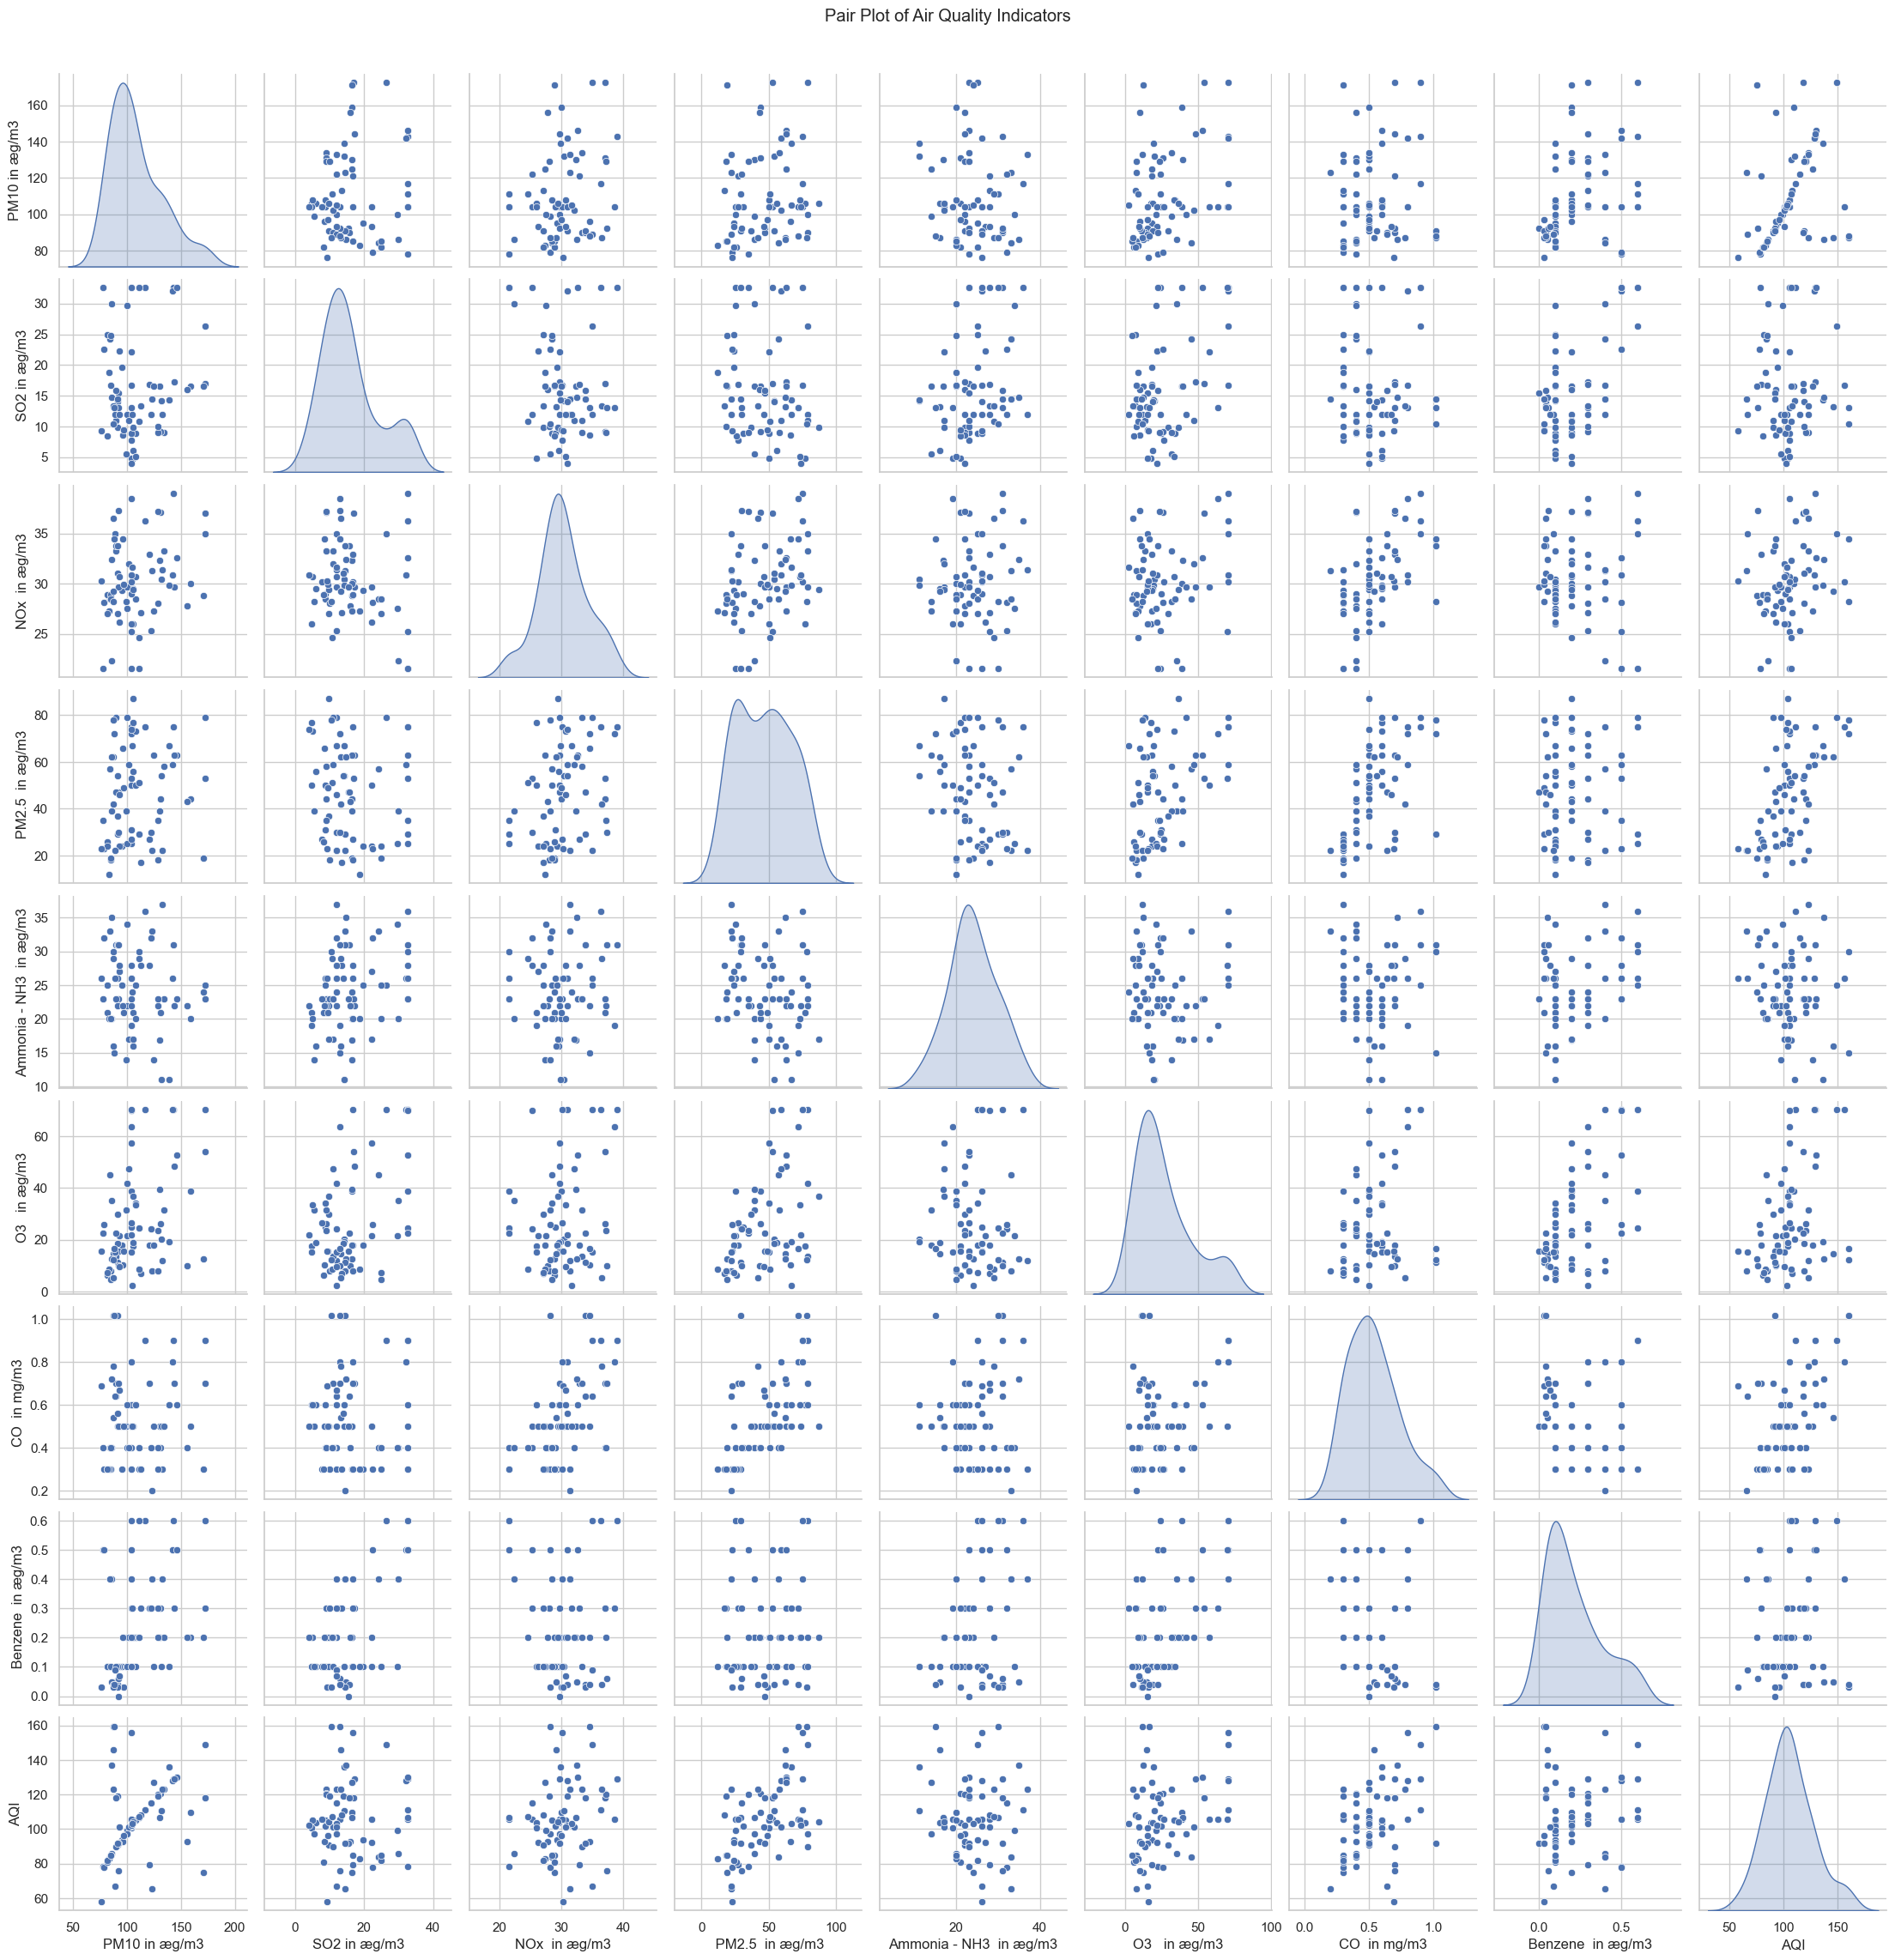

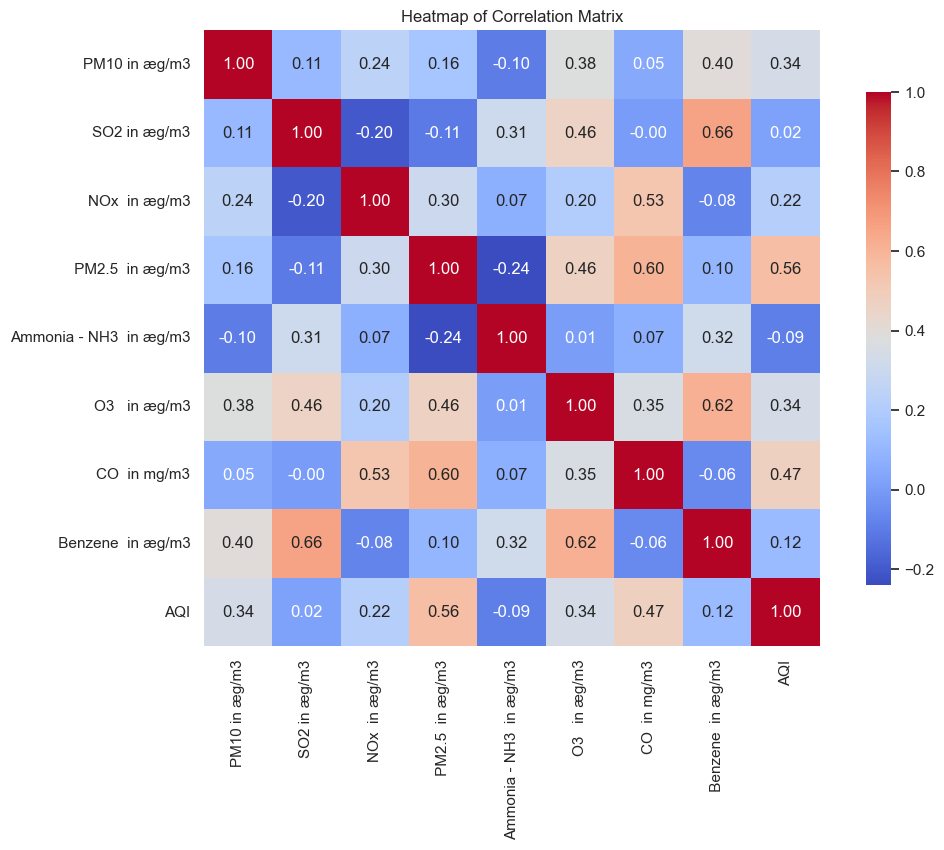

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair Plot
plt.figure(figsize=(12, 10))
sns.pairplot(df[numeric_columns], diag_kind='kde')
plt.suptitle('Pair Plot of Air Quality Indicators', y=1.02)
plt.show()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [66]:
# Save the DataFrame 'df' to a new CSV file
df.to_csv('NEW_AQI_dataset_hydrabad.csv', index=False)  # index=False prevents adding the index column to the CSV


In [67]:
df

,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
0,172.625,26.400,35.0000,79,25.0,70.1625,0.90000,0.60,149.000000
1,143.000,32.575,39.0125,75,31.0,70.1625,0.90000,0.60,129.000000
2,142.000,32.100,30.9000,59,26.0,70.1625,0.80000,0.50,128.000000
3,117.000,32.575,36.3000,75,36.0,70.1625,0.90000,0.60,111.000000
4,104.000,32.575,25.2000,53,28.0,70.0000,0.50000,0.50,105.571642
...,...,...,...,...,...,...,...,...,...
67,89.000,12.000,35.0000,22,26.0,15.2000,0.64000,0.09,67.000000
68,92.000,13.000,37.3000,30,31.0,10.0000,0.70000,0.06,76.000000
69,93.000,12.000,30.7000,46,28.0,9.7000,0.67000,0.07,101.000000
70,87.000,10.400,28.2000,78,30.0,12.1000,1.01875,0.03,159.500000
